In [54]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#loading dataset
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [56]:
print("Products Info:")
print(products.info())
print("\nTransactions Info:")
print(transactions.info())
print("\nCustomers Info:")
print(customers.info())

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), obje

In [57]:
print("\nMissing values in Products dataset:")
print(products.isnull().sum())
print("\nMissing values in Customers dataset:")
print(customers.isnull().sum())
print("\nMissing values in Transactions dataset:")
print(transactions.isnull().sum())


Missing values in Products dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Customers dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Transactions dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Merge datasets for richer insights

In [58]:
merged = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID', suffixes=('', '_Product'))

# date columns to datetime format
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
print(merged)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue   Price          CustomerName         Region  SignupDate  \
0        300.68  300.68        Andrea Jenkins         Europ

In [59]:
sns.set(style="whitegrid")

# Regional Revenue Analysis

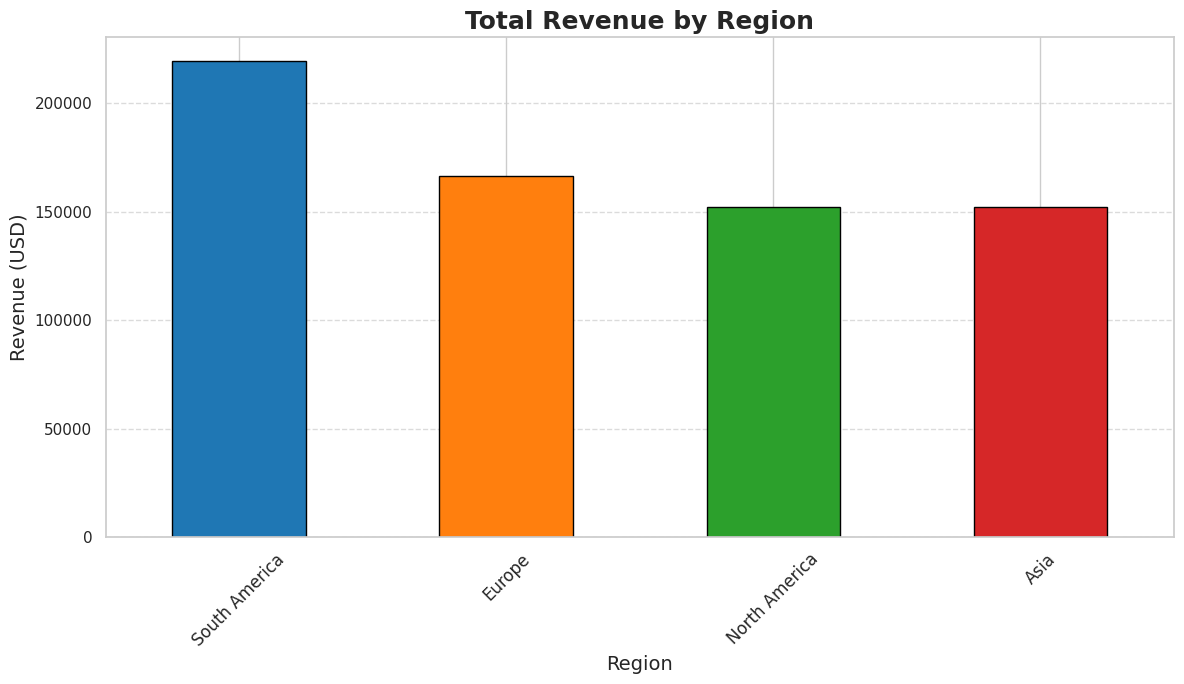

In [60]:
regional_revenue = merged.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
regional_revenue.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], edgecolor='black')
plt.title('Total Revenue by Region', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Product Popularity**

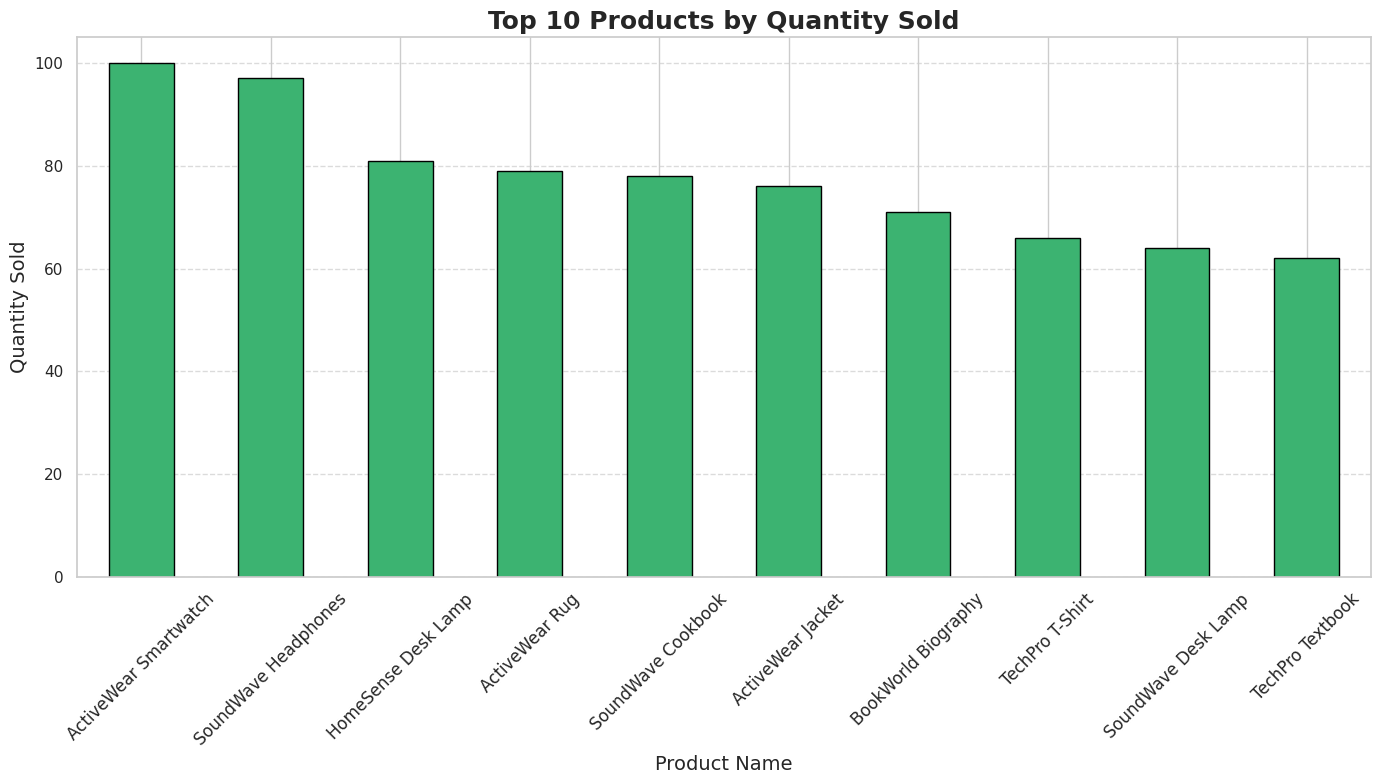

In [61]:
product_popularity = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
product_popularity.head(10).plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Top 10 Products by Quantity Sold', fontsize=18, fontweight='bold')
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**High-Value Customers**

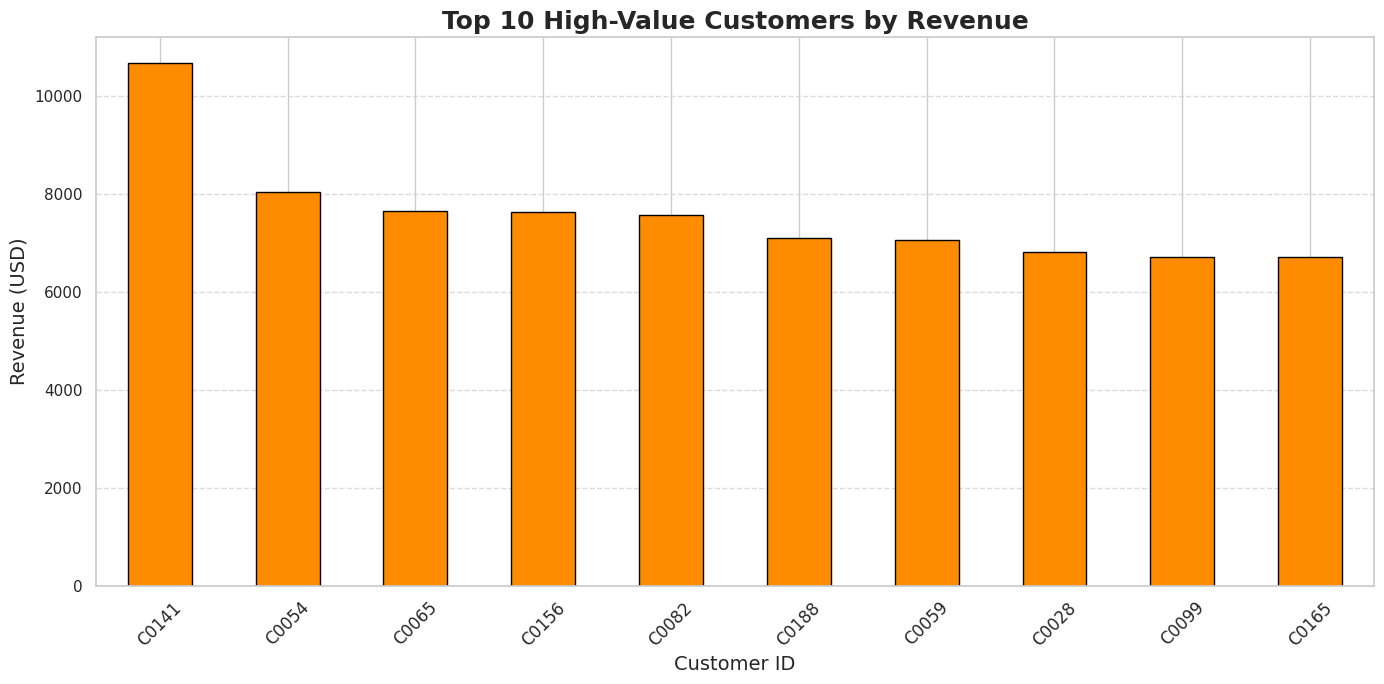

In [62]:
customer_revenue = merged.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))
customer_revenue.head(10).plot(kind='bar', color='darkorange', edgecolor='black')
plt.title('Top 10 High-Value Customers by Revenue', fontsize=18, fontweight='bold')
plt.xlabel('Customer ID', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Seasonal Trends in Revenue**

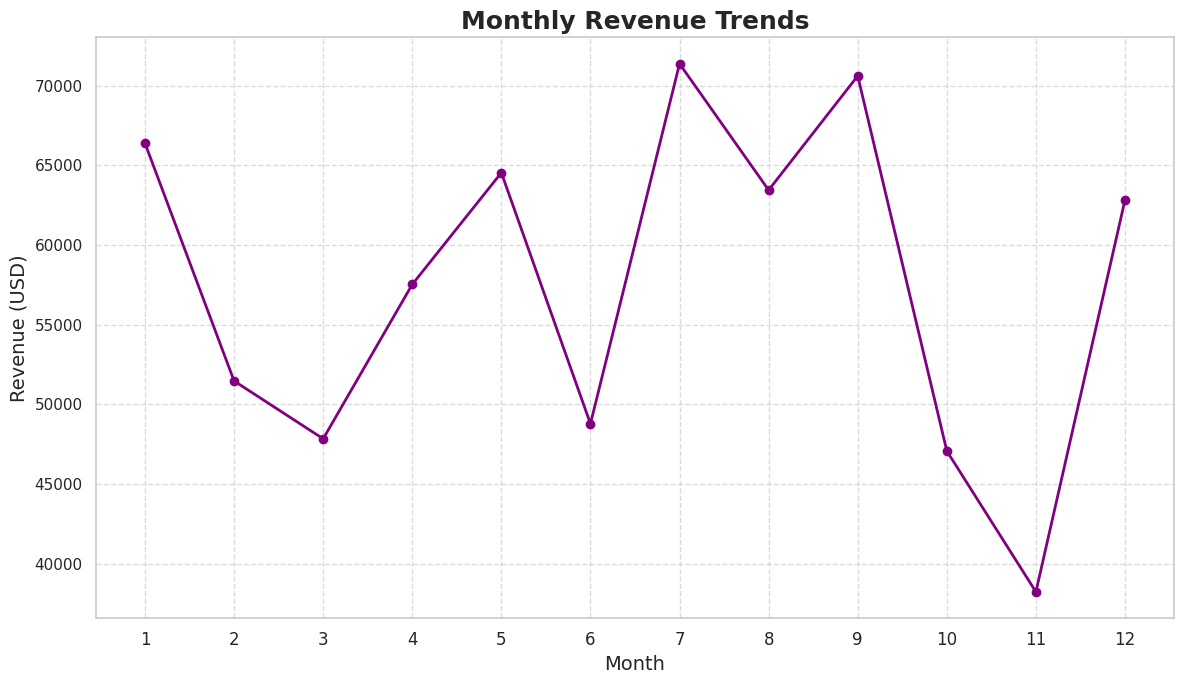

In [63]:
merged['TransactionMonth'] = merged['TransactionDate'].dt.month
seasonal_trends = merged.groupby('TransactionMonth')['TotalValue'].sum()
plt.figure(figsize=(12, 7))
seasonal_trends.plot(marker='o', color='purple', linewidth=2)
plt.title('Monthly Revenue Trends', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(range(1, 13), fontsize=12)
plt.tight_layout()
plt.show()

**Calculate total sales (quantity) by product**

<ipython-input-64-bc4e9bf08740>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")


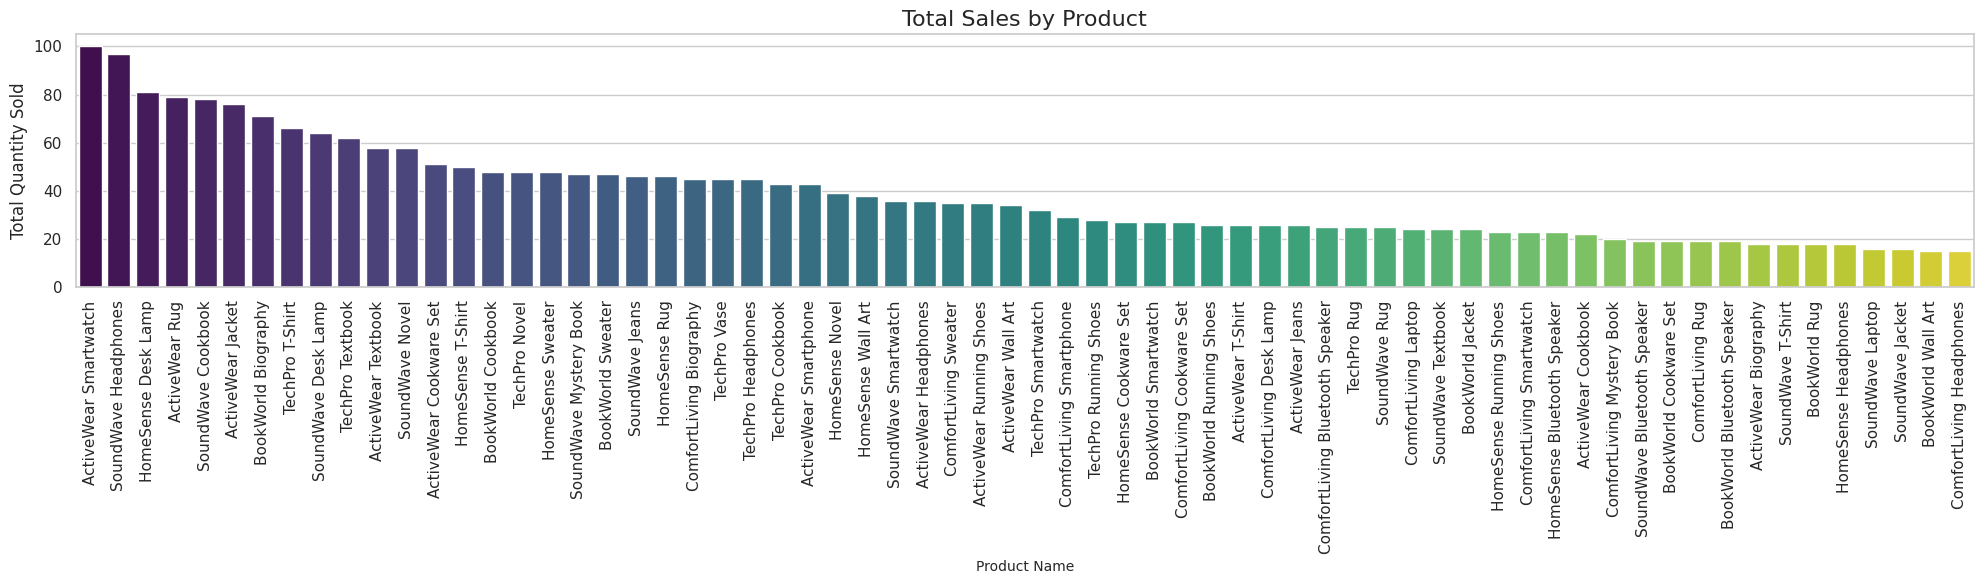

In [64]:
sales_by_product = merged.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette="viridis")
plt.title("Total Sales by Product", fontsize=16)
plt.xlabel("Product Name", fontsize=10)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Category Revenue Contribution**

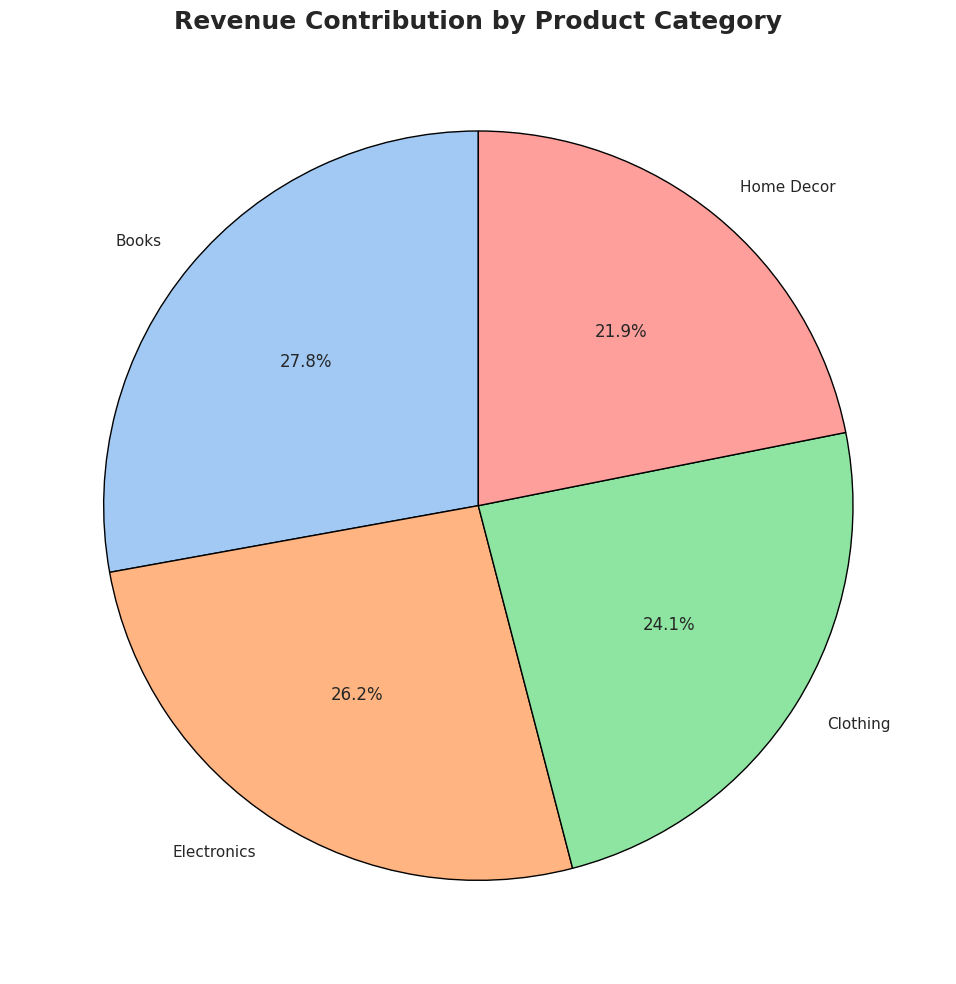

In [65]:
category_revenue = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
category_revenue.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90, wedgeprops={"edgecolor": "black"})
plt.title('Revenue Contribution by Product Category', fontsize=18, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

**Distribution of Product Prices**

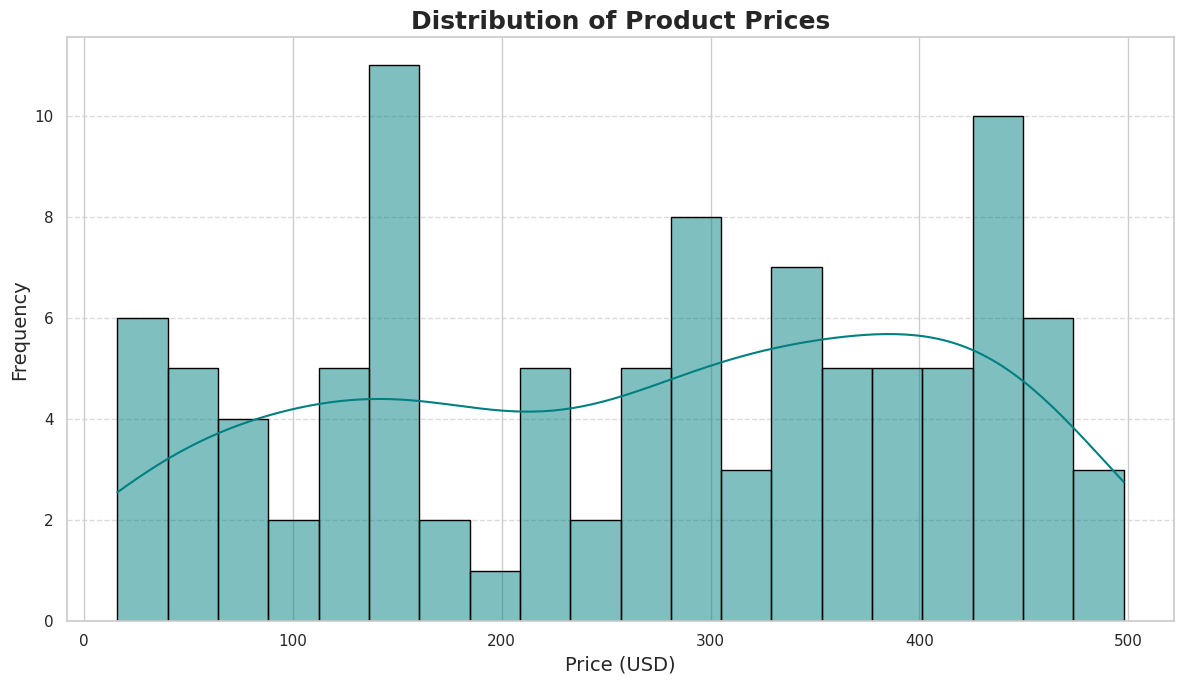

In [66]:
plt.figure(figsize=(12, 7))
sns.histplot(products['Price'], bins=20, kde=True, color='teal', edgecolor='black')
plt.title('Distribution of Product Prices', fontsize=18, fontweight='bold')
plt.xlabel('Price (USD)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Signup Trends Over Time**

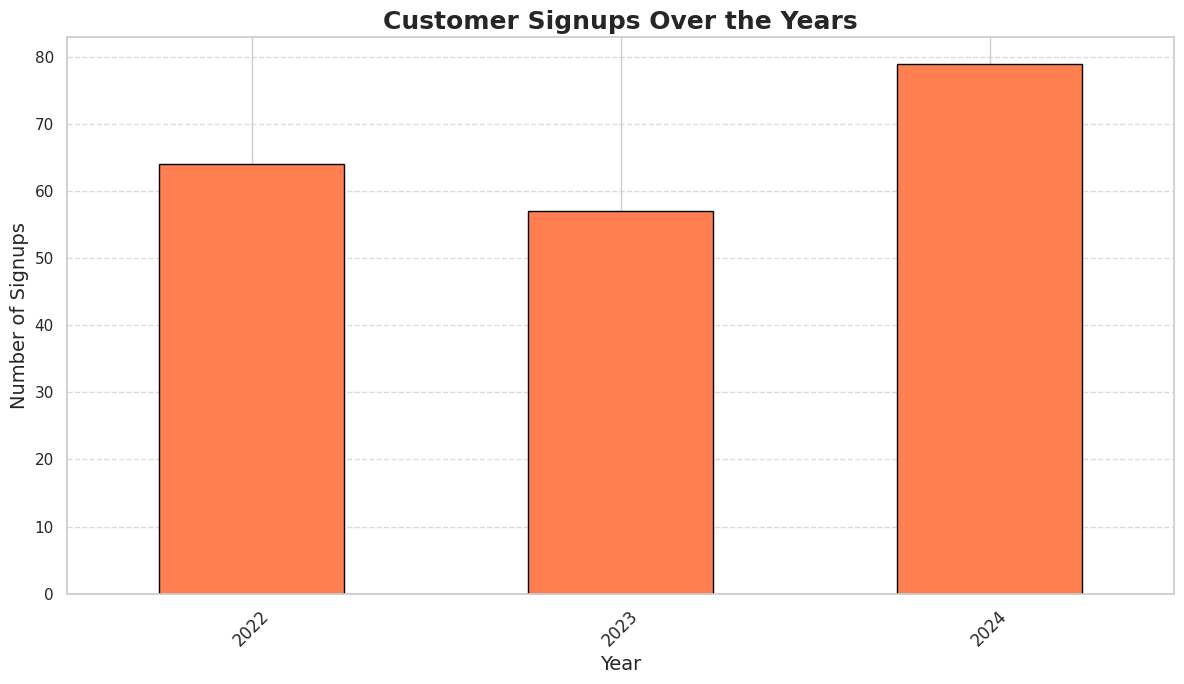

In [67]:
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 7))
signup_trends.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Customer Signups Over the Years', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Signups', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Revenue Distribution Among Customers**

<ipython-input-68-64f3ee3d05fa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=merged['Region'], y=merged['TotalValue'], palette='coolwarm')


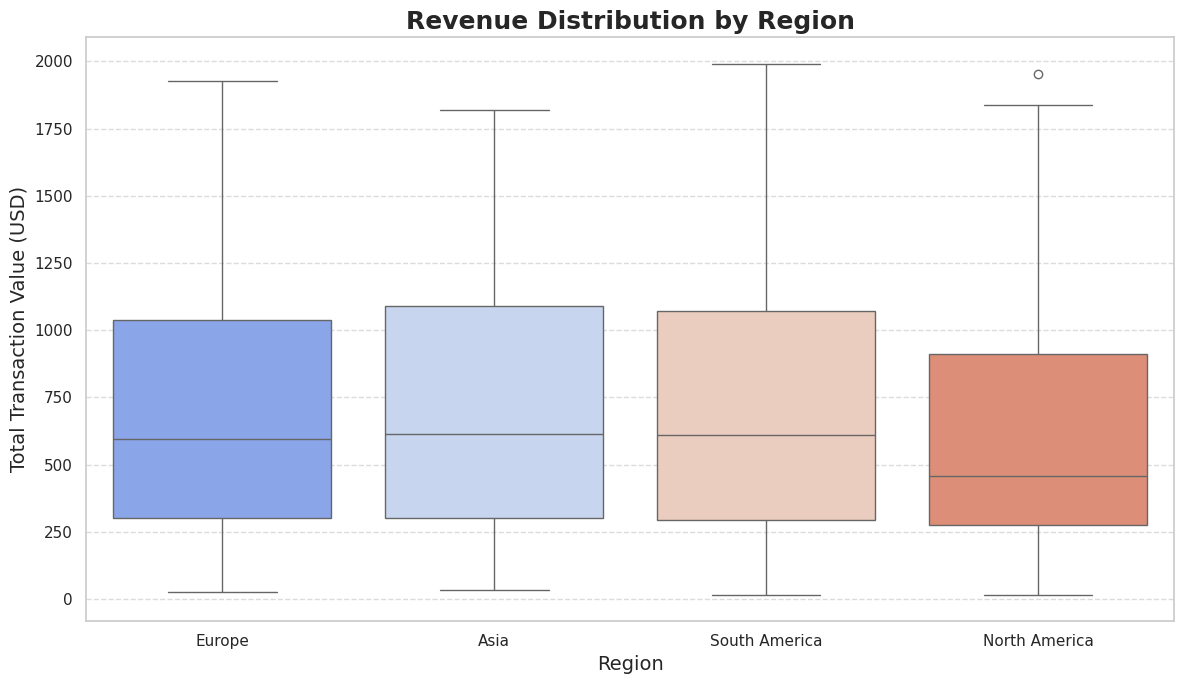

In [68]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=merged['Region'], y=merged['TotalValue'], palette='coolwarm')
plt.title('Revenue Distribution by Region', fontsize=18, fontweight='bold')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Transaction Value (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Quantity Purchased per Transaction**

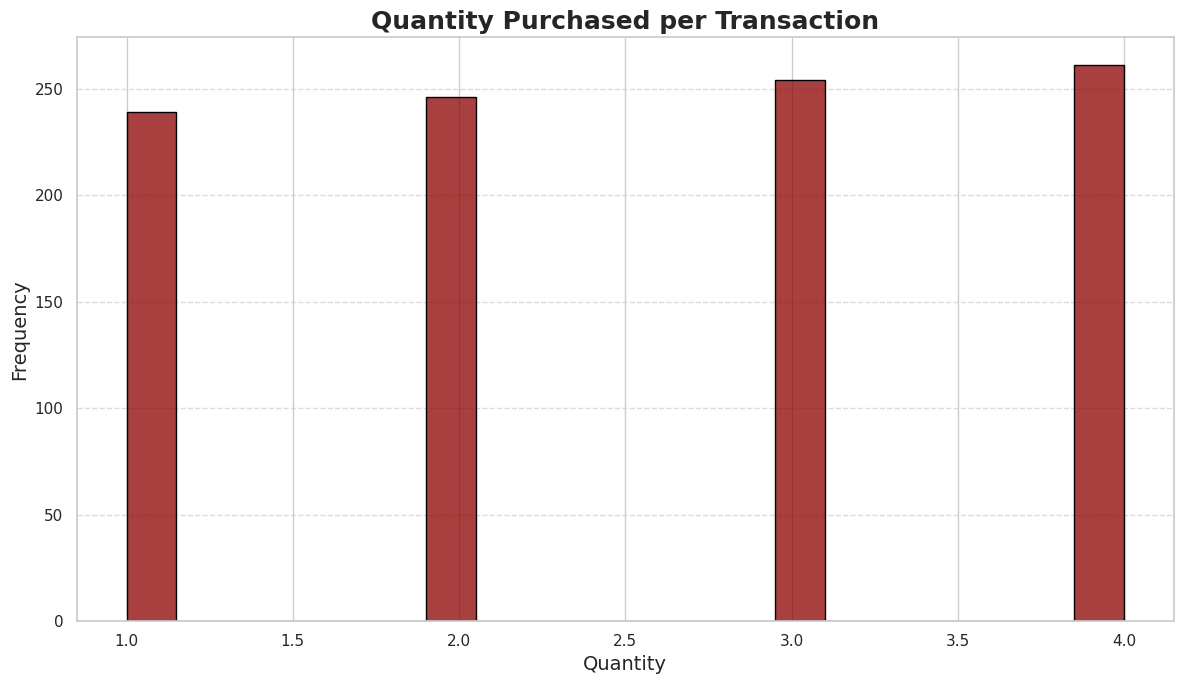

In [69]:
plt.figure(figsize=(12, 7))
sns.histplot(merged['Quantity'], bins=20, kde=False, color='darkred', edgecolor='black')
plt.title('Quantity Purchased per Transaction', fontsize=18, fontweight='bold')
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Customer Revenue by Signup Year**

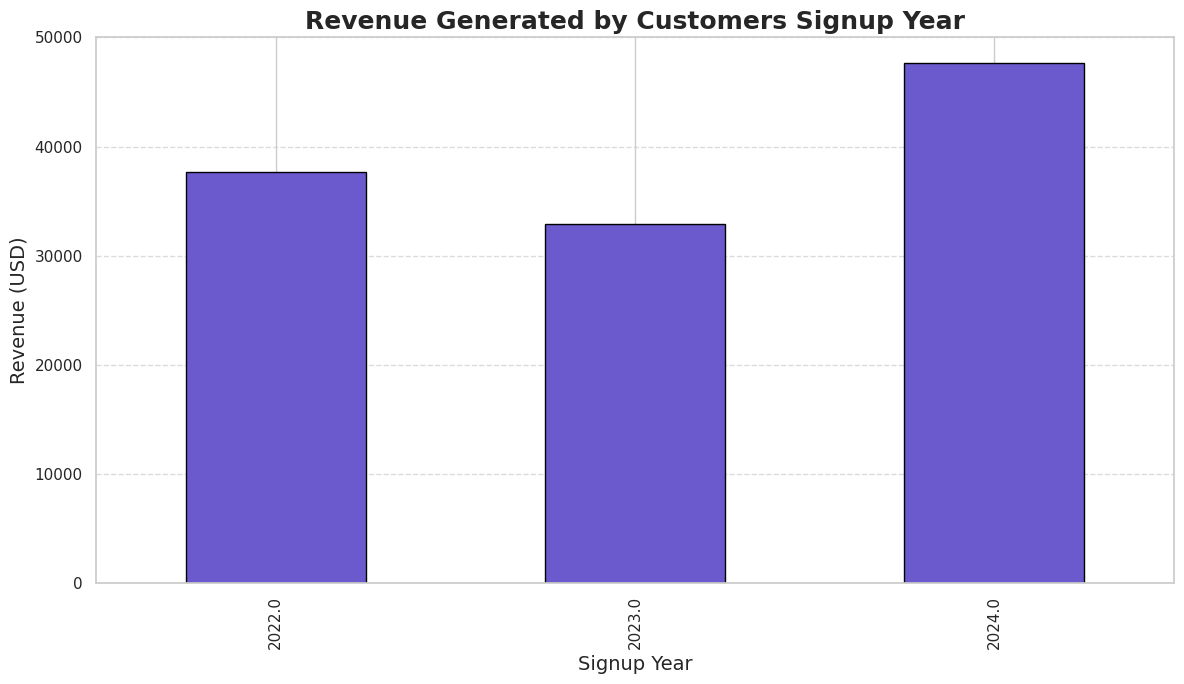

In [70]:
signup_revenue = merged.groupby(customers['SignupDate'].dt.year)['TotalValue'].sum()
plt.figure(figsize=(12, 7))
signup_revenue.plot(kind='bar', color='slateblue', edgecolor='black')
plt.title('Revenue Generated by Customers Signup Year', fontsize=18, fontweight='bold')
plt.xlabel('Signup Year', fontsize=14)
plt.ylabel('Revenue (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Correlation Heatmap for Numerical Features**

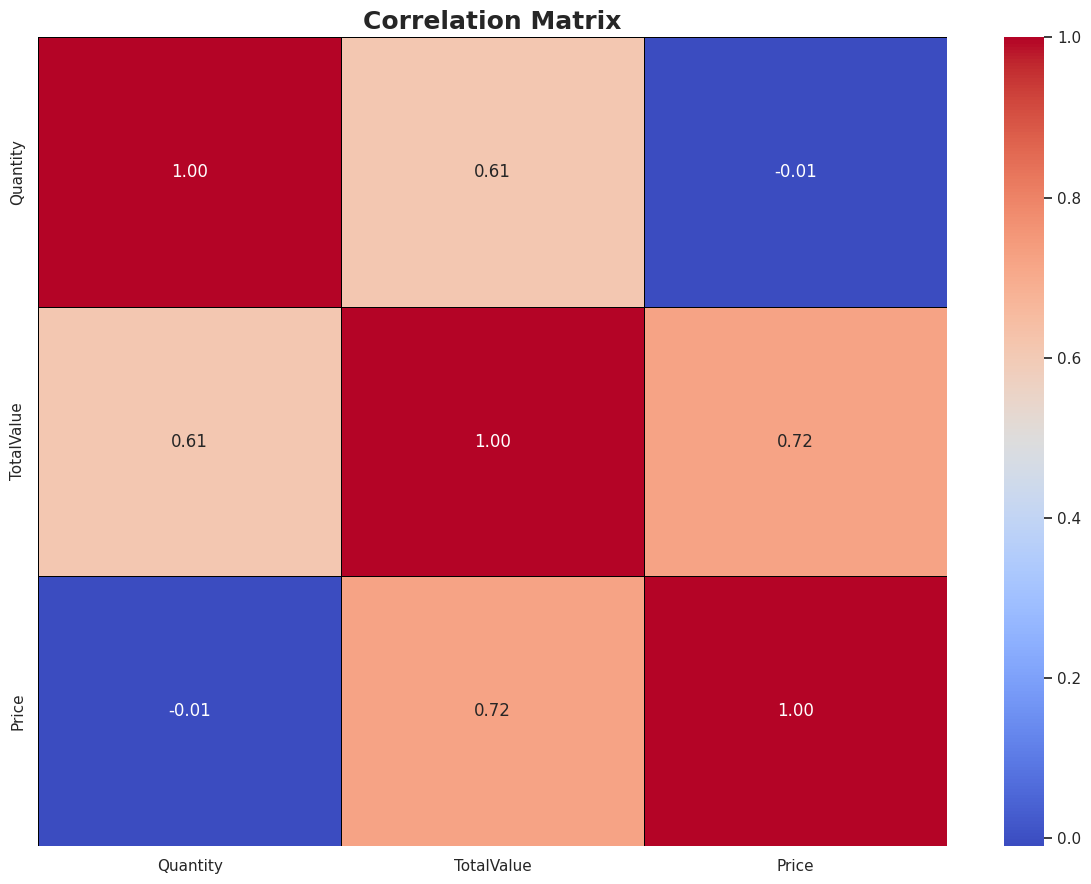

In [71]:
plt.figure(figsize=(12, 9))
correlation_matrix = merged[['Quantity', 'TotalValue', 'Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()